#INTRODUCTION
Marketing has always been a challenging task to perform. As customization becomes significant, being able to deliver the product that matches the customer's needs adds more challenges. A product that is well suited for a target aged 20-35 if advertised to the population in the age of 40-50 will not gain as much revenue as expected. Thus the right product has to be promoted to the right target group. 
As we move to the era of digitalization, product marketing has changed dramatically. The traditional marketing strategies have become obsolete in the recent past. Companies now prefer to advertise their products online on social media websites as such advertisements are highly customizable to the right target class. This has proved profitable to the companies, as the product which is for the target age of 20-25 is advertised to that age of population only. Additionally, it is cheaper to run advertisements on social media websites as compared to traditional strategies. 
However, targeting the right audience is still challenging in online marketing. A 20-year-old male living in the UK and spending 20 minutes daily on the internet has many different interests than a 20 year old male living in the USA, who spends 50 minutes on the internet daily. Spending money to display the advertisements to an audience that is not likely to buy the product can be costly. 
In this report, we work on the advertisement data of a marketing agency in Python on Jupyter notebook in Google Collab to develop a machine learning algorithm that predicts if the user will click on the ad or not.


#Importing the libraries

In [ ]:
pip install pycountry

In [ ]:
#importing all the necessary libraries required for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import datetime as dt
import keras
import sklearn
import IPython
import pydotplus
import pycountry
import plotly.express as px


# Importing the dataset

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/advertising.csv")
#Importing the Data as Dataframe "df"
df.head(5)
#Taking a look at the features to make sure data is imported correctly


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#first renaming the coloumn to make them work with code
df = df.rename(columns={"Daily Time Spent on Site": "Daily_Time_On_Site", "Daily Internet Usage": "daily_internet_usage","Clicked on Ad":"clicked_on_ad",
                        "Area Income":"area_income","Ad Topic Line":"ad_topic_line"})
df.head(5)

,Daily_Time_On_Site,Age,area_income,daily_internet_usage,ad_topic_line,City,Male,Country,Timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#changing the column names to lowercase to avoid naming errors
df.columns = df.columns.str.lower()
df.head()

,daily_time_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   daily_time_on_site    1000 non-null   float64
 1   age                   1000 non-null   int64  
 2   area_income           1000 non-null   float64
 3   daily_internet_usage  1000 non-null   float64
 4   ad_topic_line         1000 non-null   object 
 5   city                  1000 non-null   object 
 6   male                  1000 non-null   int64  
 7   country               1000 non-null   object 
 8   timestamp             1000 non-null   object 
 9   clicked_on_ad         1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
#converting columns to correct type
df['timestamp'] = pd.to_datetime(df['timestamp']) 

In [ ]:
#stripping the column Timestamp to derive more insights

df['weekday'] = df['timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['month'] = df['timestamp'].dt.month
df['dayofmonth'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df.head(5)

,daily_time_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad,weekday,month,dayofmonth,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Sunday,3,27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Monday,4,4,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Sunday,3,13,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Sunday,1,10,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Friday,6,3,3


In [ ]:
#rearranging the columns to make sure the last variable is class label
df = df[['daily_time_on_site','age','area_income','daily_internet_usage','male','ad_topic_line','city',
'country','timestamp','month','dayofmonth','hour','weekday','clicked_on_ad',]]
df.head(5)

,daily_time_on_site,age,area_income,daily_internet_usage,male,ad_topic_line,city,country,timestamp,month,dayofmonth,hour,weekday,clicked_on_ad
0,68.95,35,61833.90,256.09,0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11,3,27,0,Sunday,0
1,80.23,31,68441.85,193.77,1,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02,4,4,1,Monday,0
2,69.47,26,59785.94,236.50,0,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:42,3,13,20,Sunday,0
3,74.15,29,54806.18,245.89,1,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:19,1,10,2,Sunday,0
4,68.37,35,73889.99,225.58,0,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:18,6,3,3,Friday,0


In [ ]:
#correcting the names for the countries in the data set
df.loc[df['country']=='Slovakia (Slovak Republic)', ['country']] = 'Slovakia'
df.loc[df['country']=='Netherlands Antilles', ['country']] = 'Netherlands'
df.loc[df['country']=='Cape Verde', ['country']] = 'Cabo Verde'

#Summary Statistic

In [ ]:
df.describe() 

,daily_time_on_site,age,area_income,daily_internet_usage,male,month,dayofmonth,hour,clicked_on_ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,3.817000,15.484000,11.660000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,1.926973,8.734073,6.960952,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,1.000000,1.000000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,2.000000,8.000000,6.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,4.000000,15.000000,12.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,5.000000,23.000000,18.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,7.000000,31.000000,23.000000,1.00000


In [ ]:
df_categoric = pd.DataFrame(df, columns = ['ad_topic_line', 'city', 'country'])
df_categoric.describe()

,ad_topic_line,city,country
count,1000,1000,1000
unique,1000,969,236
top,Up-sized tertiary contingency,Williamsport,Netherlands
freq,1,3,10


In [ ]:
#looking at the frequency of countries 
crosstab = pd.crosstab(index=df['country'],columns='count').sort_values(['count'], ascending=False).head(20)

#looking at the frequency of countries with clicked on ad vs not
crosstab1 = pd.crosstab(df['country'], df['clicked_on_ad']).sort_values(1,0, ascending = False).head(20)


In [ ]:
(crosstab)

col_0,count
country,
Netherlands,10
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8


In [ ]:
crosstab1

clicked_on_ad,0,1
country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Netherlands,5,5


#Data Vizualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



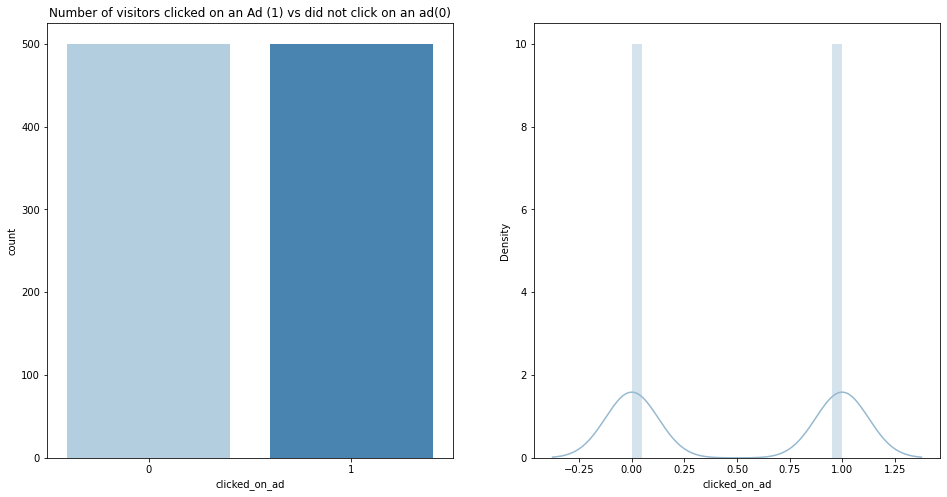

In [ ]:
#Data Visualization
#Barplot to see if class labels are well saperated
plt.figure(figsize = (16, 8)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'clicked_on_ad', data = df, palette='Blues').set(title='Number of visitors clicked on an Ad (1) vs did not click on an ad(0)')

plt.subplot(1,2,2)
sns.distplot(df["clicked_on_ad"], bins = 20, color='#96B9D0')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



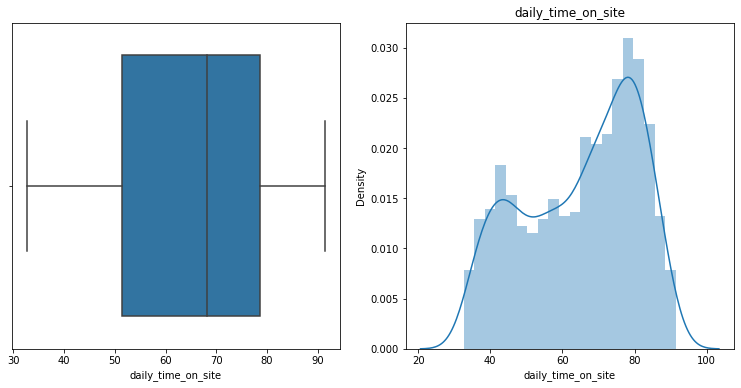

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



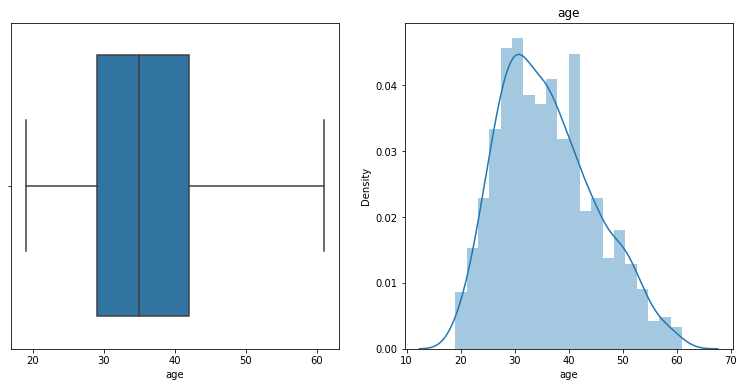

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



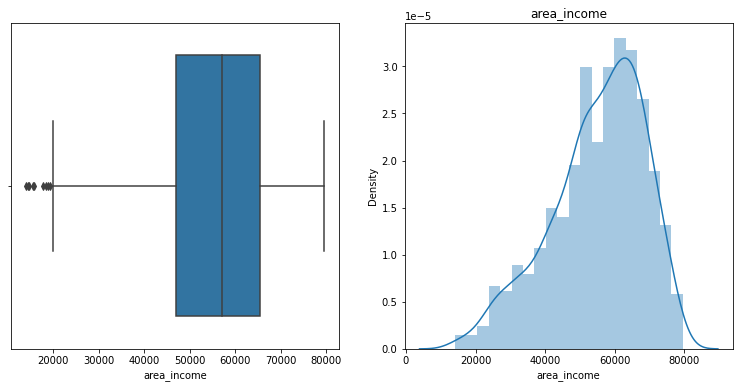

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



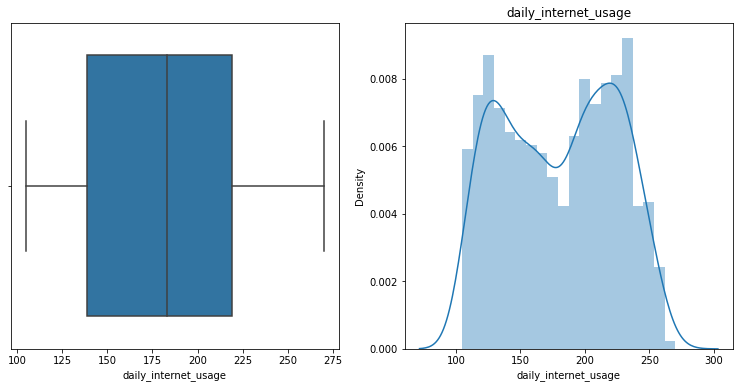

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



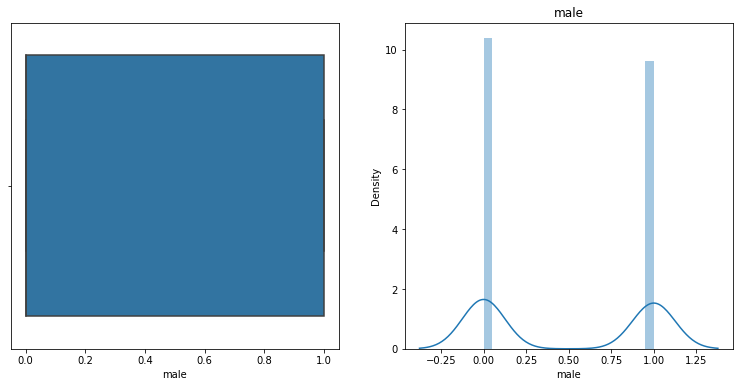

In [ ]:
#plotting the histogram to see if the data variables are distributed evenly 
plots = ['daily_time_on_site', 'age', 'area_income', 'daily_internet_usage', 'male']
for i in plots:
    plt.figure(figsize = (20, 6))
    plt.subplot(1,3,1)
    sns.boxplot(df[i])
    plt.subplot(1,3,2)
    sns.distplot(df[i],bins= 20)    
    plt.title(i)    
    plt.show()

<Figure size 2880x3600 with 0 Axes>

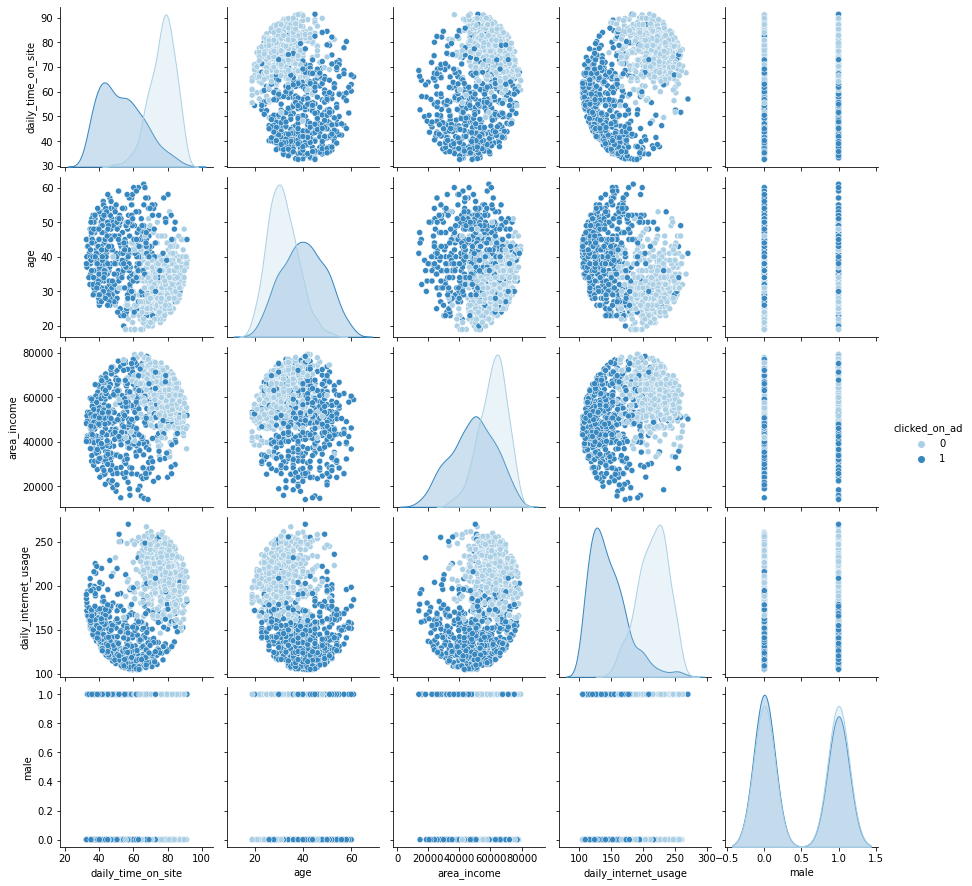

In [ ]:
plt.figure(figsize = (40, 50)) 
sns.pairplot(df, hue = 'clicked_on_ad', vars = ['daily_time_on_site', 'age', 'area_income', 'daily_internet_usage','male'], palette = 'Blues')

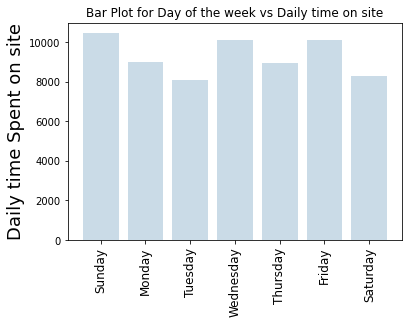

In [ ]:
#On which day Internet usage is more? Line Graph
week_day = pd.DataFrame(df, columns = ['weekday', 'daily_time_on_site'])
week_day
df11 = week_day.groupby(['weekday']).sum('daily_time_on_site').reset_index()
df11=df11.assign(day_id = [5,1,6,0,4,2,3])
df11.sort_values('day_id', inplace=True)
plt.bar(df11['weekday'], df11['daily_time_on_site'], align='center', color='#96B9D0',alpha=0.5)
plt.xticks(df11['weekday'],  rotation ='vertical',fontsize=12 ) 
plt.ylabel('Daily time Spent on site',fontsize=18 )
plt.title('Bar Plot for Day of the week vs Daily time on site')
plt.show()

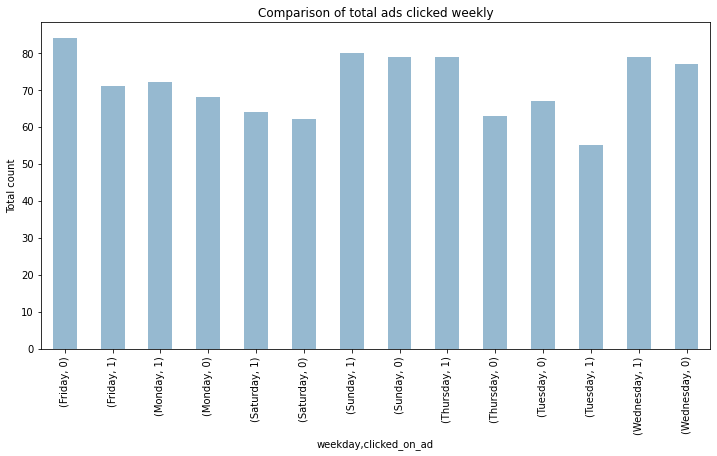

In [ ]:
day_ads = df[["weekday","clicked_on_ad"]]
day_ads= day_ads.groupby(['weekday'])['clicked_on_ad'].value_counts()
#day_ads=day_ads.reset_index().unstack()

#day_ads=day_ads.pivot(columns='weekday', values='clicked_on_ad')
#day_ads=day_ads.reset_index()

day_ads.plot(x='weekday',kind='bar', figsize=(12, 6),color = '#96B9D0', title="Comparison of total ads clicked weekly", ylabel='Total count')
#Houses_Sold_MI

In [ ]:
#Bubble plot between Age and Daily Internet Usage
heat_map = pd.DataFrame(df, columns=["age","daily_internet_usage","daily_time_on_site"])
heat_map
df9 = heat_map.groupby(['age']).sum('daily_internet_usage').reset_index()


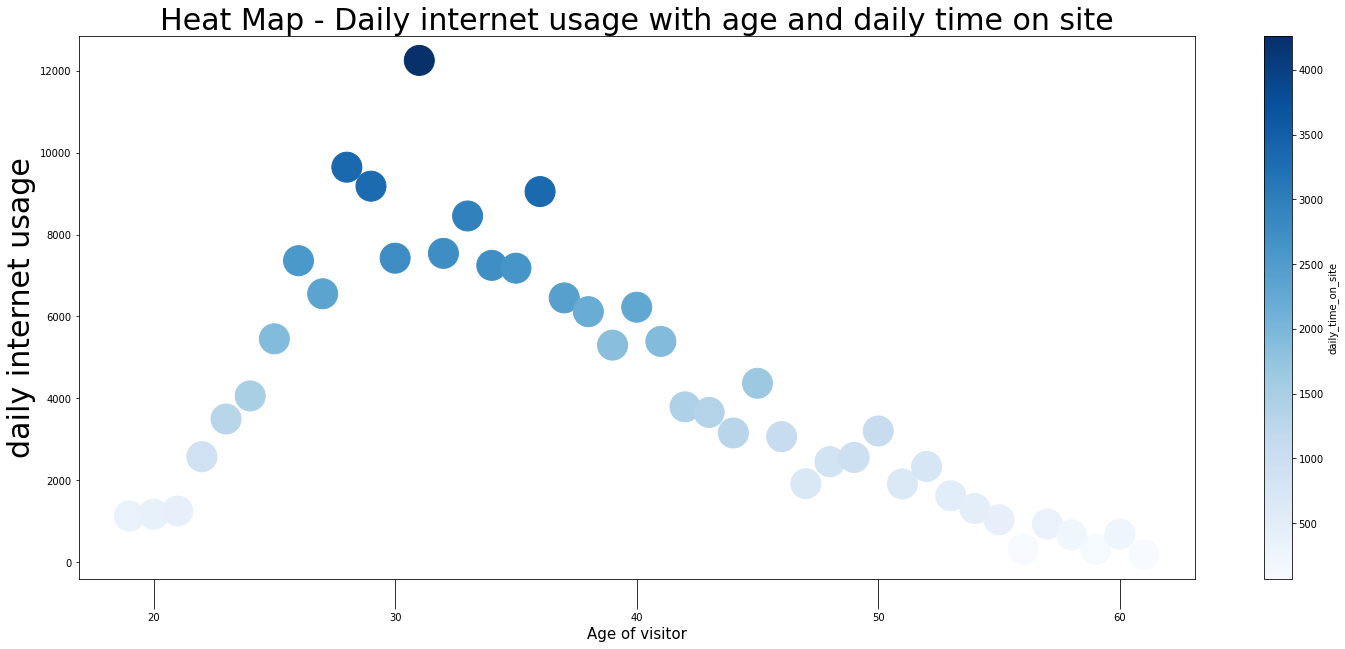

In [ ]:
ax1 = df9.plot.scatter(x='age',
                      figsize=(25,10),
                      y='daily_internet_usage',
                      c='daily_time_on_site', 
                      style="o",
                      s=900,
                      colormap='Blues'
                      )

ax1.set_ylabel('daily internet usage', size = 30)
ax1.set_title('Heat Map - Daily internet usage with age and daily time on site', size=30 )
ax1.set_xlabel('Age of visitor', size=15)
ax1.xaxis.get_label().set_visible(True)
ax1.tick_params(axis='x', bottom=True, labelbottom=True, size=30)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning

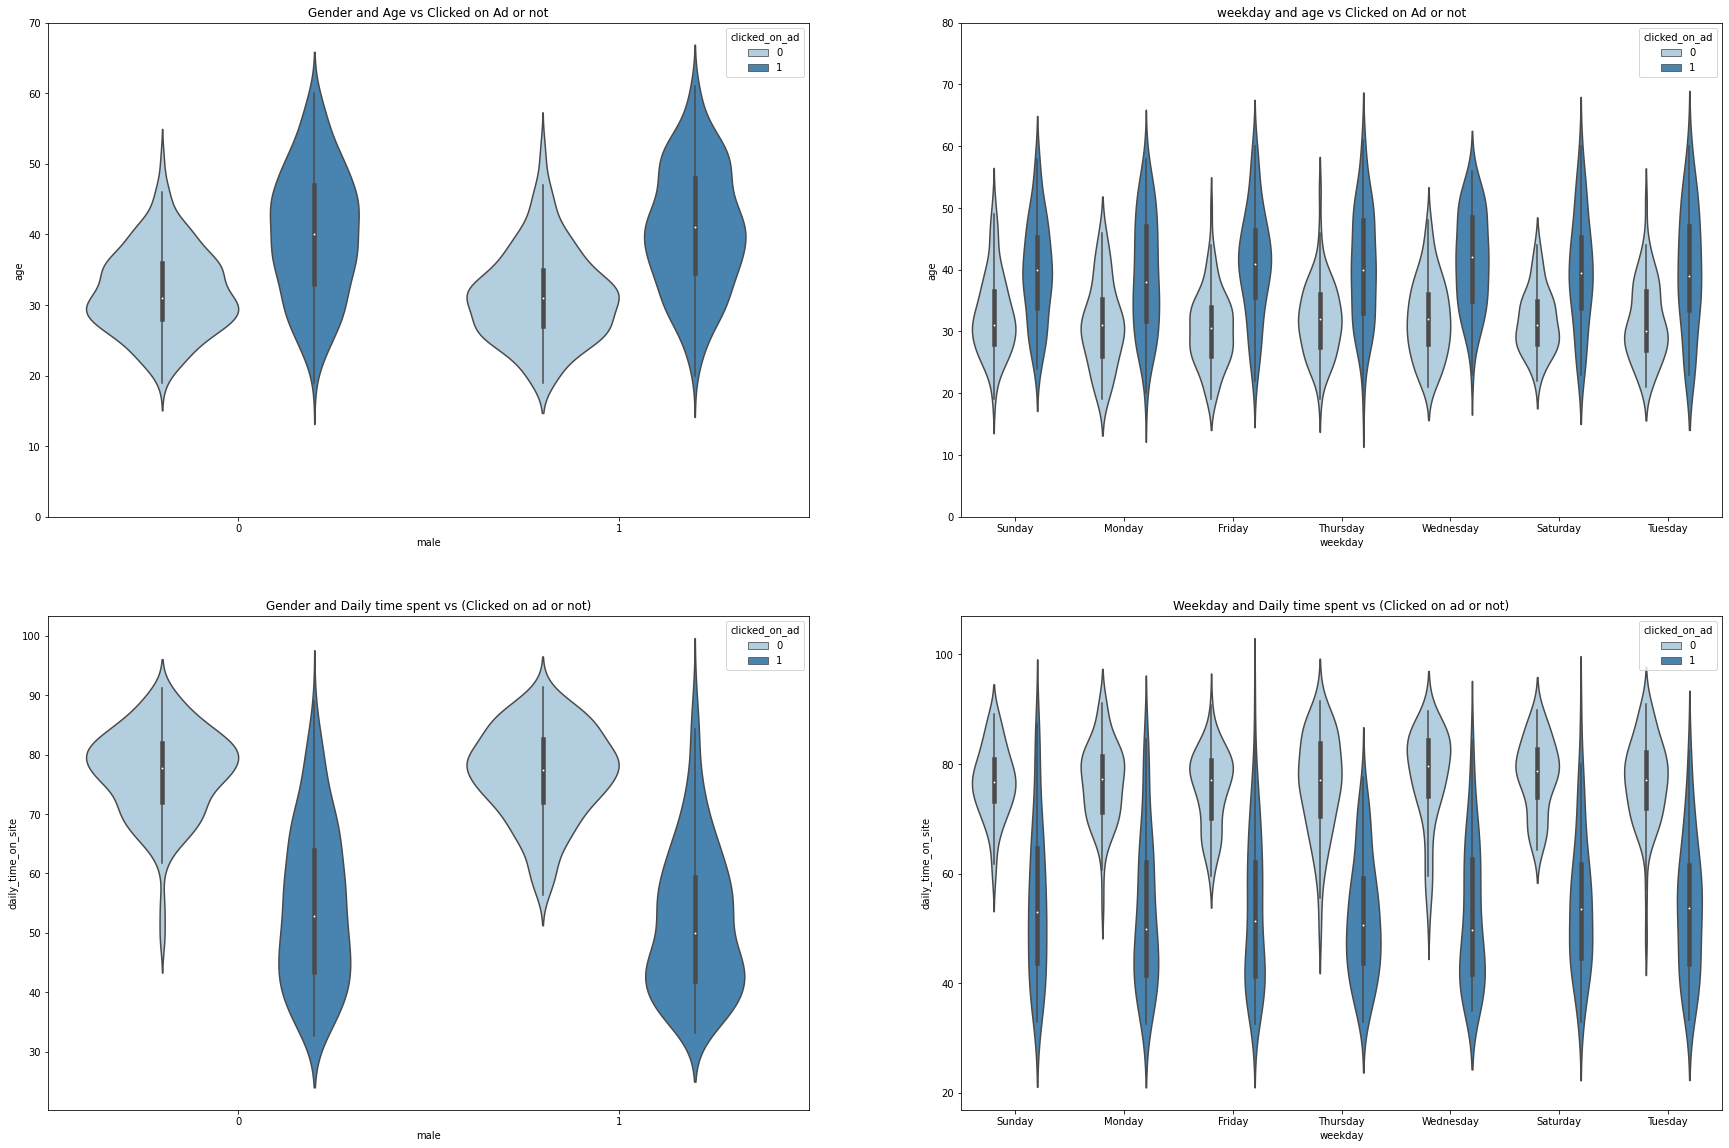

In [ ]:
f,ax=plt.subplots(2,2, figsize=(30,20))
sns.violinplot("male","age", hue= "clicked_on_ad", data=df,ax=ax[0,0],palette="Blues")
ax[0,0].set_title('Gender and Age vs Clicked on Ad or not')
ax[0,0].set_yticks(range(0,80,10))
sns.violinplot("weekday","age", hue="clicked_on_ad", data=df,ax=ax[0,1],palette="Blues")
ax[0,1].set_title('weekday and age vs Clicked on Ad or not')
ax[0,1].set_yticks(range(0,90,10))
sns.violinplot("male","daily_time_on_site", hue="clicked_on_ad", data=df,ax=ax[1,0],palette="Blues")
ax[1,0].set_title('Gender and Daily time spent vs (Clicked on ad or not)')
#ax[1,0].set_yticks(range(0,120,10))
sns.violinplot("weekday","daily_time_on_site", hue="clicked_on_ad", data=df,ax=ax[1,1],palette="Blues")
ax[1,1].set_title('Weekday and Daily time spent vs (Clicked on ad or not)')
#ax[1,1].set_yticks(range(0,120,10))
plt.show()

###Country wise plotting of timespent to clicked on ads

In [ ]:
ad_clicked = df[['country','clicked_on_ad','daily_time_on_site']].copy()
ad_clicked.head(5)
ad_clicked = ad_clicked.groupby(['country']).sum(['daily_time_on_site','clicked_on_ad']).reset_index()
ad_clicked.head(5)

,country,clicked_on_ad,daily_time_on_site
0,Afghanistan,5,518.26
1,Albania,4,443.60
2,Algeria,3,396.07
3,American Samoa,3,319.05
4,Andorra,2,99.61


In [ ]:
list_countries = ad_clicked['country'].unique().tolist()
#print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

could not add ISO 3 code for -> Antarctica (the territory South of 60 deg S)
could not add ISO 3 code for -> Bouvet Island (Bouvetoya)
could not add ISO 3 code for -> British Indian Ocean Territory (Chagos Archipelago)
could not add ISO 3 code for -> Libyan Arab Jamahiriya
could not add ISO 3 code for -> Palestinian Territory
could not add ISO 3 code for -> Pitcairn Islands
could not add ISO 3 code for -> Svalbard & Jan Mayen Islands
could not add ISO 3 code for -> Swaziland
could not add ISO 3 code for -> United States Virgin Islands


In [ ]:
for k, v in d_country_code.items():
    ad_clicked.loc[(ad_clicked.country == k), 'iso_alpha'] = v


In [ ]:
ad_clicked.loc[ad_clicked['country']=='Palestinian Territory', ['iso_alpha']] = 'PSE'
ad_clicked.loc[ad_clicked['country']=='British Indian Ocean Territory (Chagos Archipelago)', ['iso_alpha']] = 'IOT'
ad_clicked.loc[ad_clicked['country']=='Bouvet Island (Bouvetoya)', ['iso_alpha']] = 'BVT'
ad_clicked.loc[ad_clicked['country']=='Svalbard & Jan Mayen Islands', ['iso_alpha']] = 'SJM'
ad_clicked.loc[ad_clicked['country']=='Antarctica (the territory South of 60 deg S)', ['iso_alpha']] = 'ATA'
ad_clicked.loc[ad_clicked['country']=='Pitcairn Islands', ['iso_alpha']] = 'PCN'
ad_clicked.loc[ad_clicked['country']=='Libyan Arab Jamahiriya', ['iso_alpha']] = 'LBY'
ad_clicked.loc[ad_clicked['country']=='Swaziland', ['iso_alpha']] = 'SWZ'
ad_clicked.loc[ad_clicked['country']=='United States Virgin Islands', ['iso_alpha']] = 'VIR'

In [ ]:
ad_clicked.head(5)

,country,clicked_on_ad,daily_time_on_site,iso_alpha
0,Afghanistan,5,518.26,AFG
1,Albania,4,443.60,ALB
2,Algeria,3,396.07,DZA
3,American Samoa,3,319.05,ASM
4,Andorra,2,99.61,AND


In [ ]:
fig = px.choropleth(data_frame = ad_clicked,
                    locations= "iso_alpha",
                    color= "clicked_on_ad",  # value in column 'Confirmed' determines color
                    hover_name= "country",
                    hover_data = ['country', 'clicked_on_ad', 'daily_time_on_site'],
                    color_continuous_scale= 'Blues') #,  #  color scale red, yellow green
                    #animation_frame= "hour")

fig.update_layout(
    title_text='Number of visitors who CLicked on Ads from different countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'))

fig.show()

#Data Modelling

We begin with dividing the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
feature_cols = ['daily_time_on_site', 'age', 'area_income', 'daily_internet_usage','male']

In [ ]:
x = df[feature_cols]
y = df.clicked_on_ad

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [ ]:
# Create Decision Tree classifer with default parameters
clfdt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfdt = clfdt.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfdt.predict(x_test)

# Model Accuracy, and confusion matrix how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.94

Confusuin Matrix:
[[140   6]
 [ 12 142]]


In [ ]:
dt_auc = roc_auc_score(y_test, clfdt.predict(x_test))

score_train = clfdt.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = clfdt.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {dt_auc}')
print(classification_report(y_test, clfdt.predict(x_test)))

Training Accuracy : 1.0
Test Accuracy : 0.94
AUC: 0.9404910158334816
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       146
           1       0.96      0.92      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



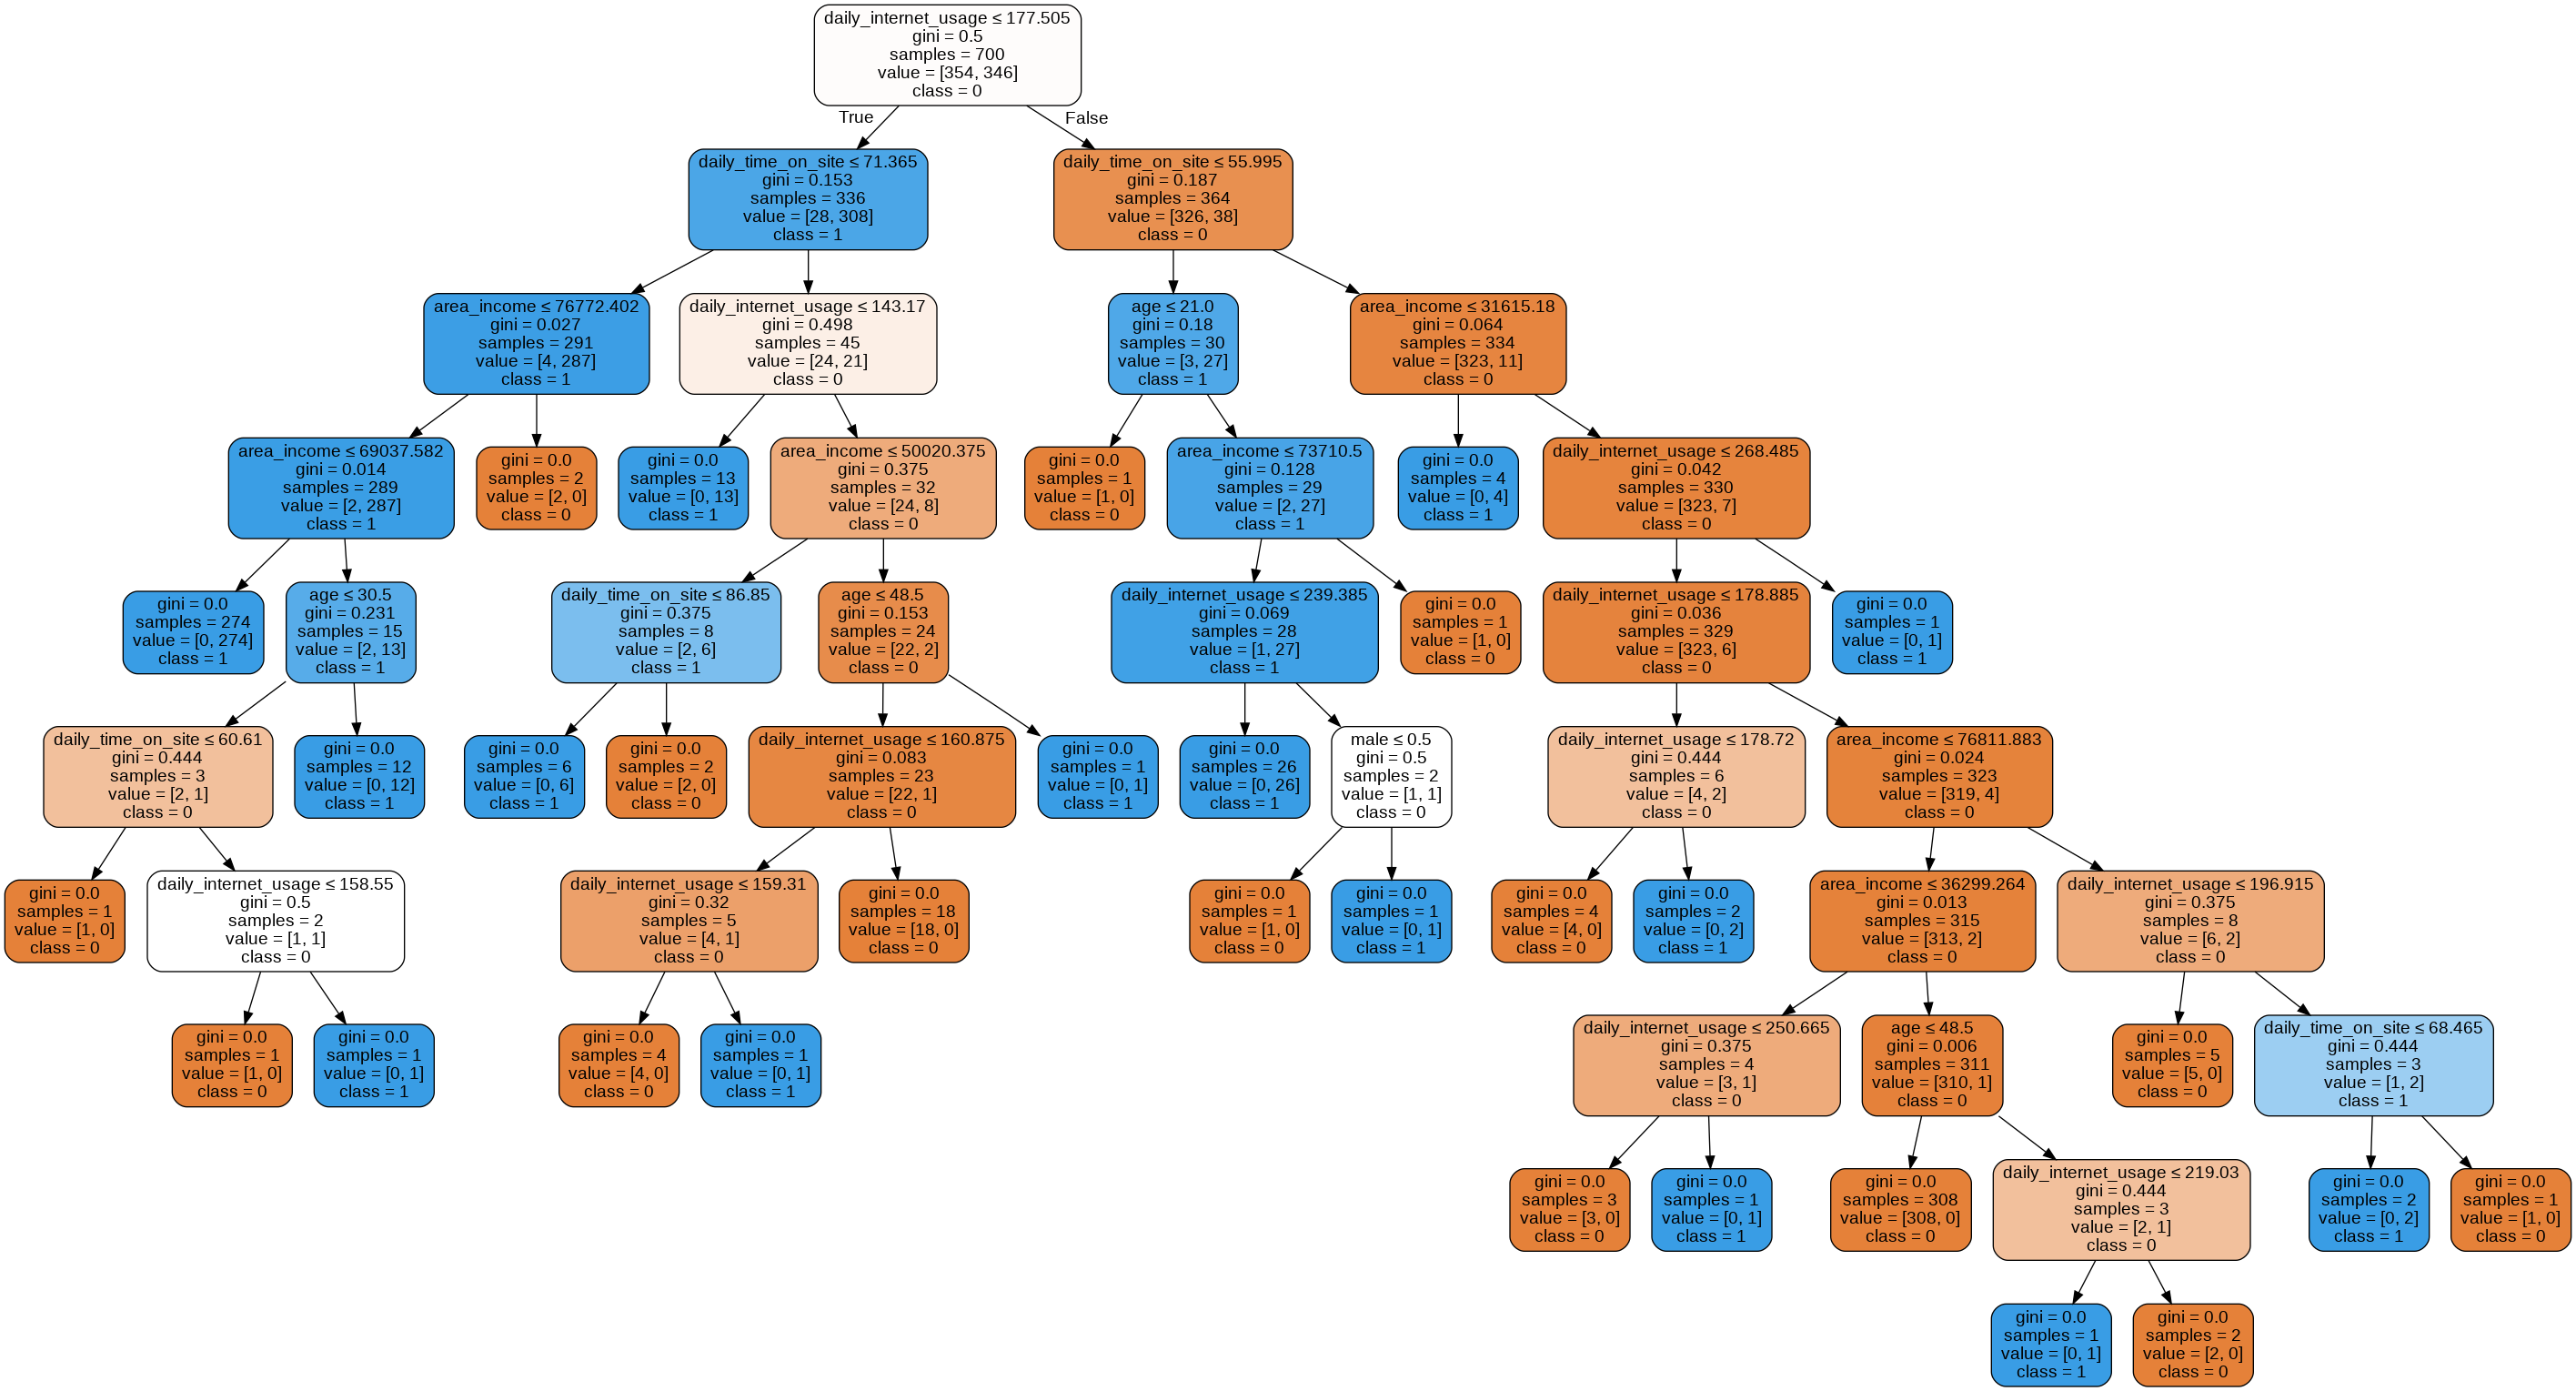

In [ ]:
#vizualizing decison tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clfdt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ad.png')
Image(graph.create_png())

In [ ]:
#Even though we get a good accuracy the tree is to complex, 
#hence we prune the decision tree to max depth of 4

# Create Decision Tree classifer object
clfdt1 = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clfdt1 = clfdt1.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfdt1.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9466666666666667

Confusuin Matrix:
[[143   3]
 [ 13 141]]


In [ ]:
dt1_auc = roc_auc_score(y_test, clfdt1.predict(x_test))

score_train = clfdt1.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = clfdt1.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {dt1_auc}')
print(classification_report(y_test, clfdt1.predict(x_test)))

Training Accuracy : 0.9814285714285714
Test Accuracy : 0.9466666666666667
AUC: 0.9475182351894682
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       146
           1       0.98      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



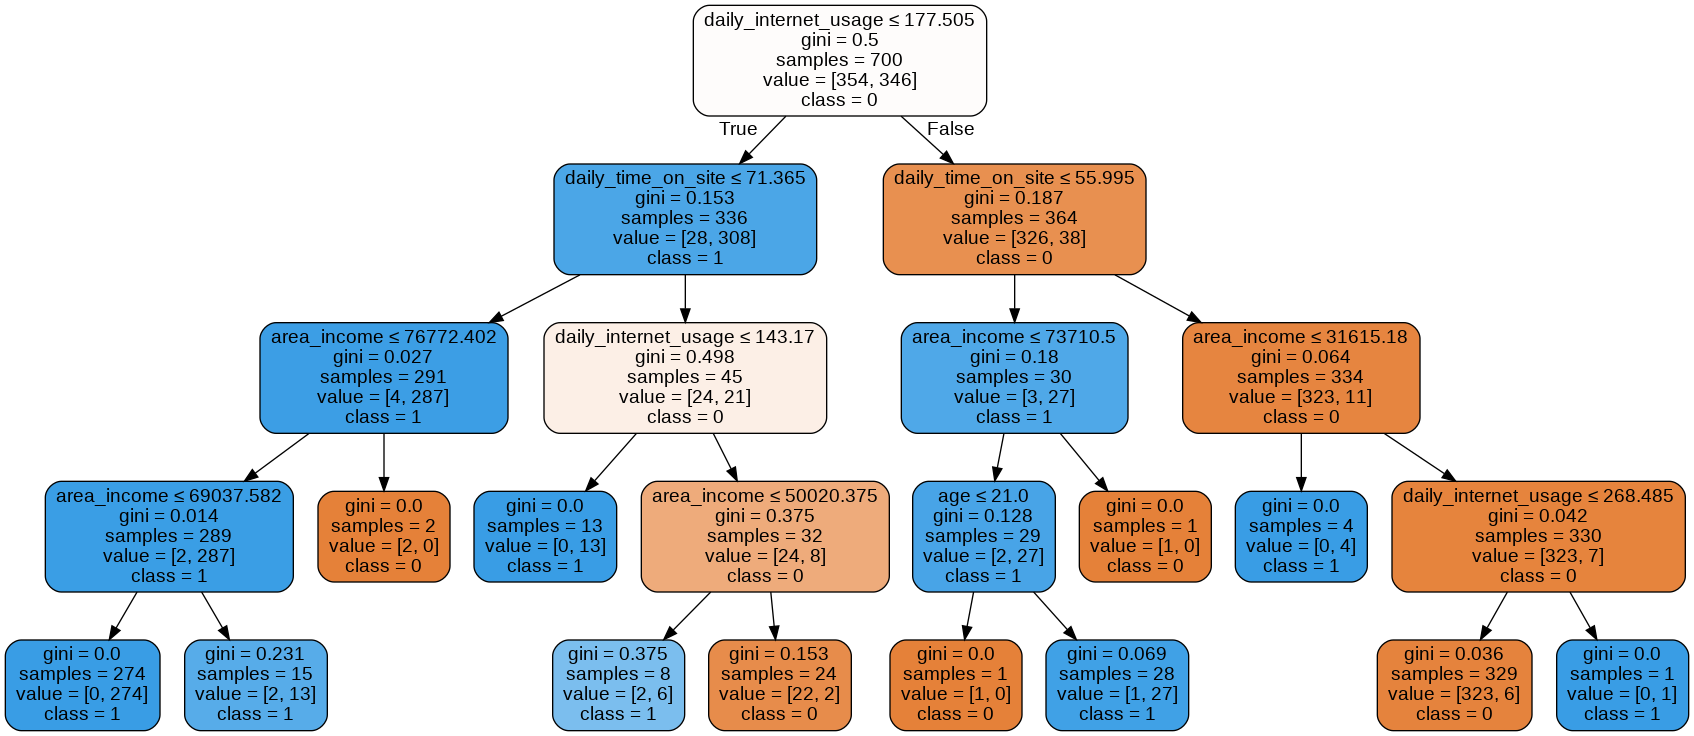

In [ ]:
dot_data = StringIO()
export_graphviz(clfdt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ad.png')
Image(graph.create_png())

In [ ]:
#checking if the results for DT change with entropy has the splitting criteria 
#hence we prune the decision tree to max depth of 4

# Create Decision Tree classifer object
clfdt2 = DecisionTreeClassifier(criterion="entropy",max_depth=4)

# Train Decision Tree Classifer
clfdt2 = clfdt2.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfdt2.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9466666666666667

Confusuin Matrix:
[[144   2]
 [ 14 140]]


In [ ]:
dt2_auc = roc_auc_score(y_test, clfdt2.predict(x_test))

score_train = clfdt2.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = clfdt2.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {dt2_auc}')
print(classification_report(y_test, clfdt2.predict(x_test)))

Training Accuracy : 0.9785714285714285
Test Accuracy : 0.9466666666666667
AUC: 0.9476961394769614
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       146
           1       0.99      0.91      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Support Vector Machine

In [ ]:
#SVM gives a poor result as compared to Decision tree
from mlxtend.plotting import plot_decision_regions
from sklearn import svm

In [ ]:
clfsvm = svm.SVC(C=1.0, kernel='linear',decision_function_shape='ovr',probability=True)
# Train Decision Tree Classifer
clfsvm = clfsvm.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfsvm.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9633333333333334

Confusuin Matrix:
[[145   1]
 [ 10 144]]


In [ ]:
clfsvm_auc = roc_auc_score(y_test, clfsvm.predict(x_test))

score_train = clfsvm.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = clfsvm.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {clfsvm_auc}')
print(classification_report(y_test, clfdt.predict(x_test)))

Training Accuracy : 0.9714285714285714
Test Accuracy : 0.9633333333333334
AUC: 0.9641078099982208
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       146
           1       0.96      0.92      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
clfsvm1 = svm.SVC(C=1.0,kernel='rbf',decision_function_shape='ovr')
# Train Decision Tree Classifer
clfsvm1 = clfsvm1.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfsvm1.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6933333333333334

Confusuin Matrix:
[[125  21]
 [ 71  83]]


In [ ]:
svm_auc = roc_auc_score(y_test, clfsvm1.predict(x_test))

score_train = clfsvm1.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = clfsvm1.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {svm_auc}')
print(classification_report(y_test, clfsvm1.predict(x_test)))

Training Accuracy : 0.7185714285714285
Test Accuracy : 0.6933333333333334
AUC: 0.6975627112613413
              precision    recall  f1-score   support

           0       0.64      0.86      0.73       146
           1       0.80      0.54      0.64       154

    accuracy                           0.69       300
   macro avg       0.72      0.70      0.69       300
weighted avg       0.72      0.69      0.69       300



##K nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier(3)
# Train Decision Tree Classifer
knn_clf = knn_clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = knn_clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7066666666666667

Confusuin Matrix:
[[117  29]
 [ 59  95]]


In [ ]:
knn_clf1 = KNeighborsClassifier(1)
# Train Decision Tree Classifer
knn_clf1 = knn_clf1.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = knn_clf1.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7466666666666667

Confusuin Matrix:
[[119  27]
 [ 49 105]]


In [ ]:
knn_auc = roc_auc_score(y_test, knn_clf1.predict(x_test))

score_train = knn_clf1.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = knn_clf1.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {knn_auc}')
print(classification_report(y_test, knn_clf1.predict(x_test)))

Training Accuracy : 1.0
Test Accuracy : 0.7466666666666667
AUC: 0.7484433374844334
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       146
           1       0.80      0.68      0.73       154

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



##Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_clf = GaussianNB()
nb_clf = nb_clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = nb_clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('')
print("Confusuin Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.96

Confusuin Matrix:
[[144   2]
 [ 10 144]]


In [ ]:
nb_auc = roc_auc_score(y_test, nb_clf.predict(x_test))

score_train = nb_clf.score(x_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test =nb_clf.score(x_test, y_test)
print('Test Accuracy : ' + str(score_test))
print(f'AUC: {nb_auc}')
print(classification_report(y_test, nb_clf.predict(x_test)))

Training Accuracy : 0.97
Test Accuracy : 0.96
AUC: 0.9606831524639743
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.99      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



##Neural Network

In [ ]:
from sklearn import preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   daily_time_on_site    1000 non-null   float64       
 1   age                   1000 non-null   int64         
 2   area_income           1000 non-null   float64       
 3   daily_internet_usage  1000 non-null   float64       
 4   male                  1000 non-null   int64         
 5   ad_topic_line         1000 non-null   object        
 6   city                  1000 non-null   object        
 7   country               1000 non-null   object        
 8   timestamp             1000 non-null   datetime64[ns]
 9   month                 1000 non-null   int64         
 10  dayofmonth            1000 non-null   int64         
 11  hour                  1000 non-null   int64         
 12  weekday               1000 non-null   object        
 13  clicked_on_ad      

In [ ]:
dataset = df.values
dataset
X = dataset[:,0:5]
Y = dataset[:,13]
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

In [ ]:
#normalizing the data between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
X_val= np.asarray(X_val).astype(np.float32)
Y_val= np.asarray(Y_val).astype(np.float32)
X_val= tf.convert_to_tensor(X_val)
Y_val= tf.convert_to_tensor(Y_val)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Perceptron Model

In [ ]:
nn_p = Sequential([Dense(1, activation='sigmoid'),])

In [ ]:
nn_p.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy'])

In [ ]:
#our data is quite small so we try to change the parameters (1000 obs)
model = nn_p.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_data=(X_val,Y_val))
#epoch tells the model how many times we will pass the data from the model
#batch_size is what size we used to pass the data from the model

Epoch 1/100
22/22 [==============================] - 0s 6ms/step - loss: 0.9413 - accuracy: 0.3129 - val_loss: 0.9100 - val_accuracy: 0.3133
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.9153 - accuracy: 0.3000 - val_loss: 0.8900 - val_accuracy: 0.3000
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8932 - accuracy: 0.2957 - val_loss: 0.8731 - val_accuracy: 0.2933
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8744 - accuracy: 0.3071 - val_loss: 0.8589 - val_accuracy: 0.3067
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8586 - accuracy: 0.3171 - val_loss: 0.8468 - val_accuracy: 0.3067
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8448 - accuracy: 0.3414 - val_loss: 0.8362 - val_accuracy: 0.3467
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.3757 - val_loss: 0.8269 - val_accuracy: 0.3933
Epoch 8/100
2

In [ ]:
print("Test Accuracy:",nn_p.evaluate(X_test, Y_test)[1])
print("Training Accuracy:",nn_p.evaluate(X_train, Y_train)[1])
print("Validation Accuracy:" ,nn_p.evaluate(X_val, Y_val)[1])

5/5 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.9067
Test Accuracy: 0.9066666960716248
22/22 [==============================] - 0s 801us/step - loss: 0.4728 - accuracy: 0.9071
Training Accuracy: 0.9071428775787354
5/5 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.9333
Validation Accuracy: 0.9333333373069763


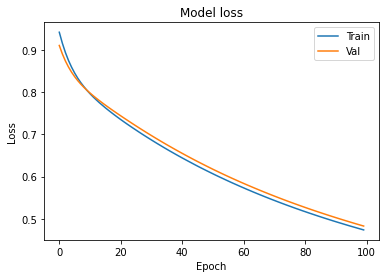

In [ ]:
#Plotting the neural network loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#loss is decreasing

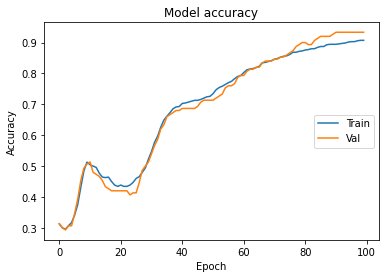

In [ ]:
#Plotting neural network accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='center right')
plt.show()

Multilayer Neural network 

In [ ]:
nn_mn = Sequential([Dense(25, activation='relu', input_shape=(5,)),    
                    Dense(25, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

In [ ]:
nn_mn.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy'])

In [ ]:
model1 = nn_mn.fit(X_train, Y_train,
          batch_size=32, epochs=100,
           validation_data=(X_val,Y_val))

Epoch 1/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7344 - accuracy: 0.3000 - val_loss: 0.7201 - val_accuracy: 0.3933
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.3900 - val_loss: 0.7061 - val_accuracy: 0.4267
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4729 - val_loss: 0.6954 - val_accuracy: 0.4933
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5329 - val_loss: 0.6863 - val_accuracy: 0.4867
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5186 - val_loss: 0.6777 - val_accuracy: 0.4867
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5186 - val_loss: 0.6697 - val_accuracy: 0.4800
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.5186 - val_loss: 0.6616 - val_accuracy: 0.4800
Epoch 8/100
2

In [ ]:
nn_auc = roc_auc_score(Y_test, nn_mn.predict(X_test))
print("Test Accuracy:",nn_mn.evaluate(X_test, Y_test)[1])
print("Training Accuracy:",nn_mn.evaluate(X_train, Y_train)[1])
print("Validation Accuracy:" ,nn_mn.evaluate(X_val, Y_val)[1])

5/5 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9400
Test Accuracy: 0.9399999976158142
22/22 [==============================] - 0s 933us/step - loss: 0.1278 - accuracy: 0.9614
Training Accuracy: 0.9614285826683044
5/5 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9733
Validation Accuracy: 0.9733333587646484


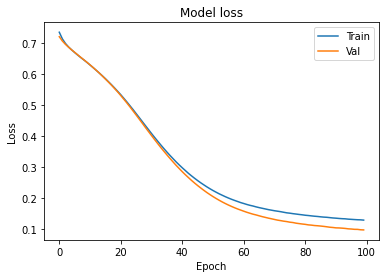

In [ ]:
#Plotting the neural network
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#loss is decreasing

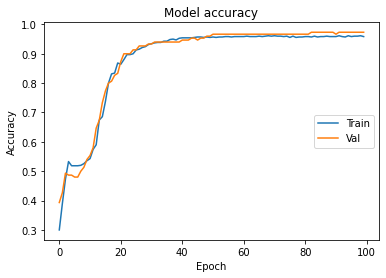

In [ ]:
#Plotting neural network accuracy
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='center right')
plt.show()

#ROC

Instructions for updating:
Please use `model.predict()` instead.


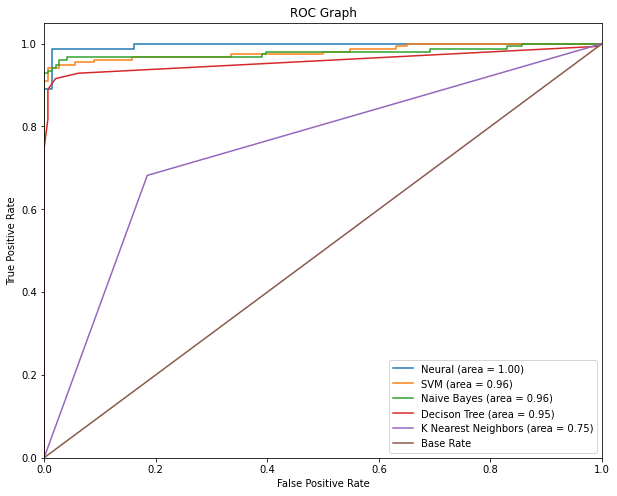

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clfsvm.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, nn_mn.predict_proba(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, clfdt1.predict_proba(x_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_clf.predict_proba(x_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_clf1.predict_proba(x_test)[:,1])

plt.figure(figsize = (10, 8))

# Plot Multilayer Neural Network ROC
plt.plot(rf_fpr, rf_tpr, label='Neural (area = %0.2f)' % nn_auc)

# Plot SVM ROC
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % clfsvm_auc)

#Plot Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_auc)

#Plot Decison tree
plt.plot(dt_fpr, dt_tpr, label='Decison Tree (area = %0.2f)' % dt1_auc)

#Plot KNN - 1 
plt.plot(knn_fpr, knn_tpr, label='K Nearest Neighbors (area = %0.2f)' % knn_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

#Checking important columns based on Neural Network

In [ ]:
columns = x.columns
train = pd.DataFrame(np.atleast_2d(x_train), columns=columns) # Converting numpy array list into dataframes

In [ ]:
feature_importances = pd.DataFrame(clfdt1.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,daily_internet_usage,0.744767
1,daily_time_on_site,0.191449
2,area_income,0.058278
3,age,0.005506
4,male,0.000000


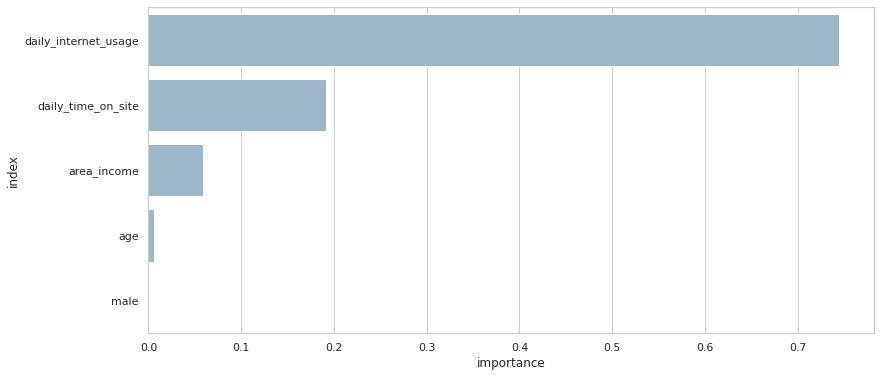

In [ ]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 6))

# Plot the Feature Importance

sns.barplot(x="importance", y='index', data=feature_importances[0:10],
            label="Total", color="#96B9D0")

#CONCLUSION
Most of the visitors on the site are in the age group of 20 to 40 and usually are spending more than 60 minutes on the site. However, these are the visitors who aren't clicking on any of the ads posted. This indicates that the advertisements shown to most of the visitors are not relevant to them. The income range for most of the visitors is between $40,000  to  $80,000, however, this group does not click on any ad. Therefore, the target visitors for the advertisements on the website are individuals with an income range of lower than $40,000, who spend up to 200 minutes on the internet and up to 80 minutes on the site. Additionally, the ads are missing out to target the rest of the 50% of the population, which indicates poor ad placement.
This analysis is limited: a greater depth of understanding and evaluation can only occur with the utilization of other resources such as type of website, content on the website, and the type of ads being displayed (the ad topic line does not tell if the ad is for a graphical user interface training or an ad of a developer who will develop the interface. Only after the availability of this information more reliable recommendations on the type of advertisements to display and segments to target can be determined. Additionally, in which form are the ads illustrated, in -video, picture-in-picture is unknown. Once these pieces of information are appended to the model, more useful predictions can be made.
